# Loan Application Status Prediction

# Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.

# Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

# Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading dataset
df=pd.read_csv('loan_prediction.csv')

In [3]:
#Let's see first 10 values of data.

df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
#Let's see last 10 values of data.

df.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
#Let's check the shape of dataset
df.shape

(614, 13)

There are 614 rows and 13 columns including our target variable present in our dataset

In [6]:
#Let's check the datatype of dataset
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

There are 8 object, 4 flot and 1 integer attributes in our dataset

In [7]:
#Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
#Checking Null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

So, We can clearly see that there are few attributes where Null values are present

In [48]:
## for Numeric Attributes
num_df=df.select_dtypes(exclude='object')

## for categorical Attributes
obj_df=df.select_dtypes(include='object')

In [9]:
# Dropping unnecessary columns. Loan Id has no significance to predict our Loan Status.
df=df.drop(['Loan_ID'],axis=1)

<AxesSubplot:title={'center':'NUll values'}>

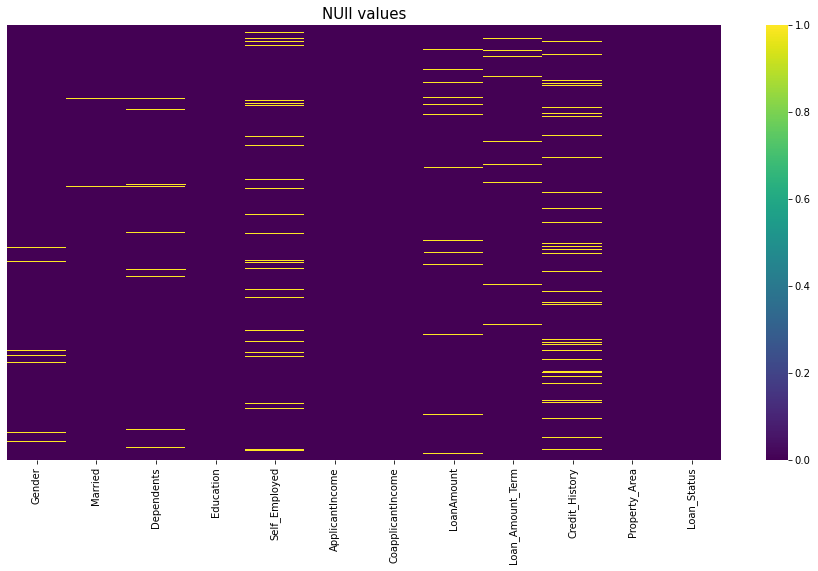

In [10]:
#Let's see null values by heatmap
plt.figure(figsize=(16,8))
plt.title('NUll values',fontsize=15)
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

This dataset has few Null Values which we will deal later.

In [11]:
# filling the missing values for numerical terms - median
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].median())

In [12]:
# Filling the missing values for categorical terms - mode
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [13]:
#Let's check Null values now
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

So, Now there is no Null values in our dataset

<AxesSubplot:title={'center':'NUll values'}>

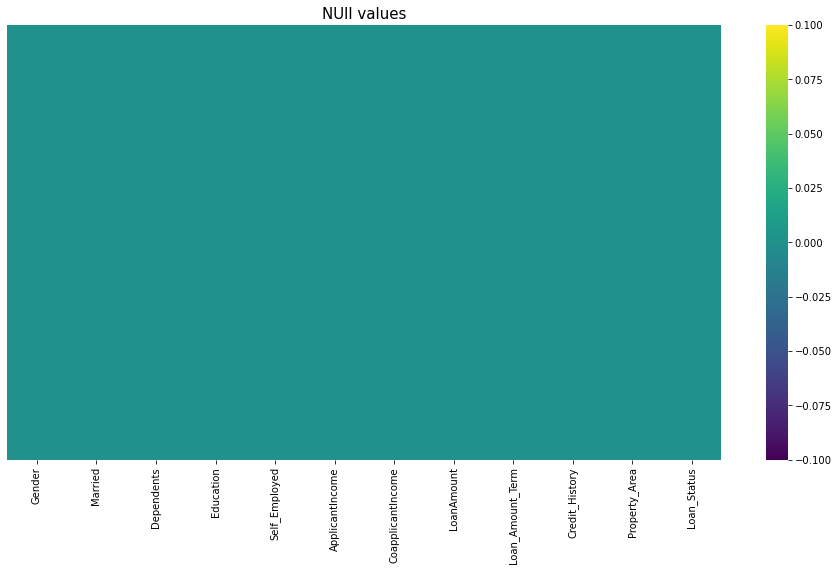

In [22]:
#Let's see null values by heatmap
plt.figure(figsize=(16,8))
plt.title('NUll values',fontsize=15)
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

There is no Null values now in dataset

In [14]:
#Statistical summary
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


We can clearly see Applicantincome, Coapplicantincome, LoanAmount are Right skewed because Mean values is greater than the Median Values.

Loan Amount & Loan_amount term are left skewed because Median is greater than Mean values.

There is a compartively high difference between 3rd quantile (75%) and max values which also proves that outiliers are present in dataset

<AxesSubplot:title={'center':'Correlation Heatmap'}>

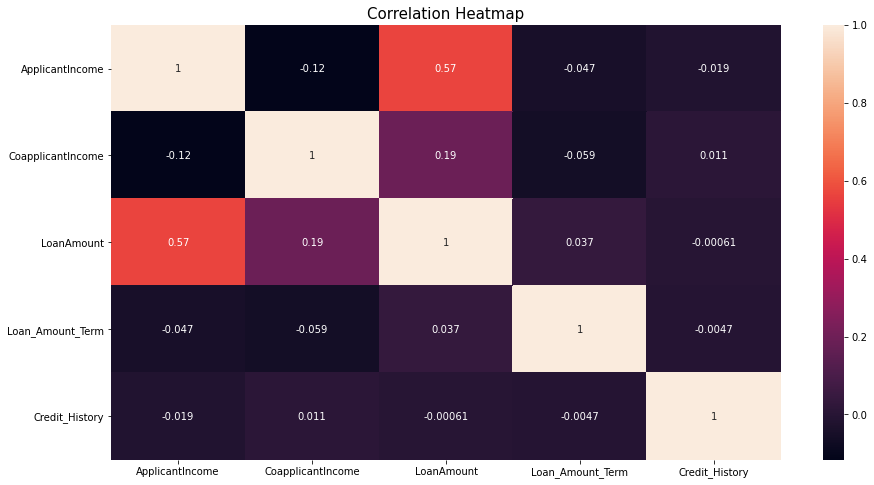

In [24]:
## correlation Plot
plt.figure(figsize=(15,8))
plt.title('Correlation Heatmap',fontsize=15)
sns.heatmap(df.corr(),annot=True)

Our Loan amount is highly correlated with Applicant Income which is .57.

Neither the strong positive nor the strong negative correlation present in any variable.

# Data Visualization

<AxesSubplot:title={'center':'Male Vs Female'}, xlabel='Gender', ylabel='count'>

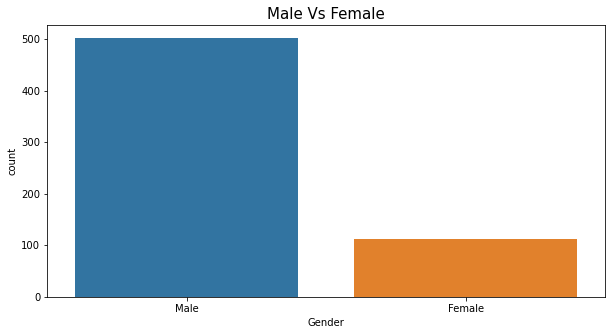

In [23]:
plt.figure(figsize=(10,5))
plt.title('Male Vs Female',fontsize=15)
sns.countplot(df['Gender'],data=df)

Almost 500 Male and 100 Female applied for the loan.

<AxesSubplot:title={'center':'Married Vs unmarried'}, xlabel='Married', ylabel='count'>

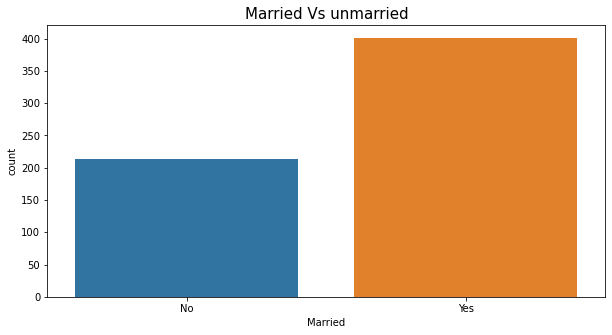

In [16]:
plt.figure(figsize=(10,5))
plt.title('Married Vs unmarried',fontsize=15)
sns.countplot(df['Married'])

Almost 400 married & more than 200 unmarried people applied for loan

<AxesSubplot:title={'center':'Dependents'}, xlabel='Dependents', ylabel='count'>

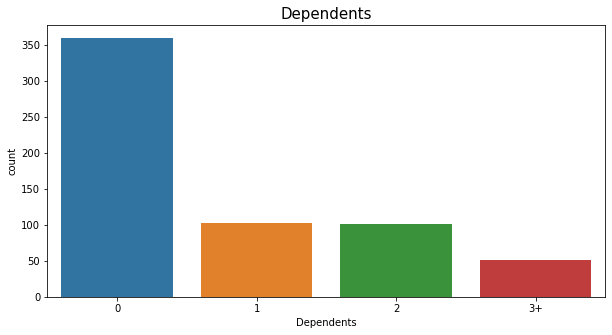

In [17]:
plt.figure(figsize=(10,5))
plt.title('Dependents',fontsize=15)
sns.countplot(df['Dependents'])

More than 350 people doesn't have any dependents and around 100 people have either 1 or 2 dependents in family. Less than 50 people are there who has more than 3 dependents in family

<AxesSubplot:title={'center':'Self Employed'}, xlabel='Self_Employed', ylabel='count'>

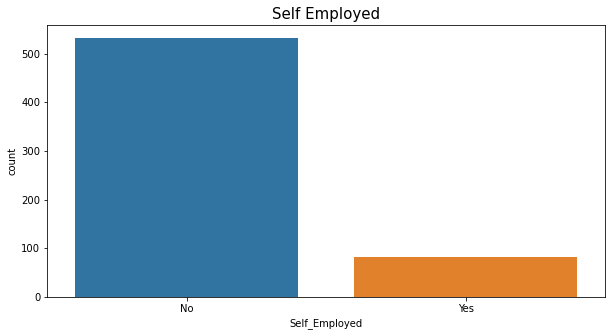

In [18]:
plt.figure(figsize=(10,5))
plt.title('Self Employed',fontsize=15)
sns.countplot(df['Self_Employed'])

More than 500 people applied for loan aren't self employed and more than 50 people are self employed.

<AxesSubplot:title={'center':'Loan Status'}, xlabel='Loan_Status', ylabel='count'>

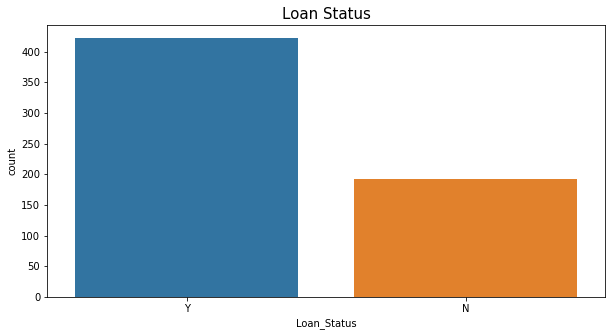

In [19]:
plt.figure(figsize=(10,5))
plt.title('Loan Status',fontsize=15)
sns.countplot(df['Loan_Status'])

<AxesSubplot:title={'center':'property area'}, xlabel='Property_Area', ylabel='count'>

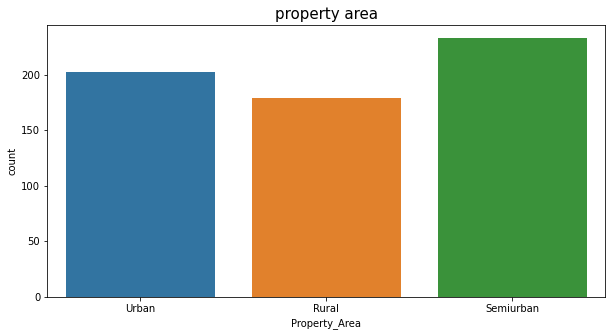

In [20]:
plt.figure(figsize=(10,5))
plt.title('property area',fontsize=15)
sns.countplot(df['Property_Area'])

More than 200 people belongs to Semiurban area, arond 200 people belongs to urban area and around 170-180 people belongs to Rural area.

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>]],
      dtype=object)

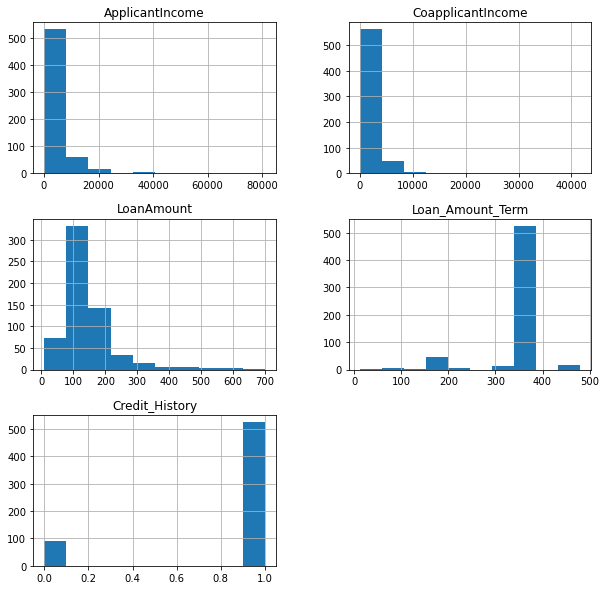

In [21]:
df.hist(figsize=(10,10))

# Bi-variate Analysis

In [25]:
# Creating a function
def relation_target(df,col):
    plt.figure(figsize=(15,6))
    plt.title(col+' Vs Loan_Status ',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
    sns.countplot(x =col, hue ="Loan_Status",palette='colorblind' ,data = df)
    plt.plot()

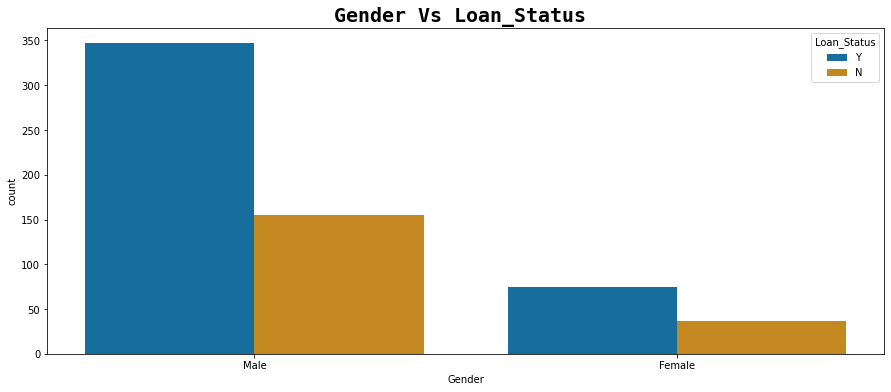

In [26]:
relation_target(df,'Gender')

We could see that Mostly Males sanctioned for loan as compaired to Females.



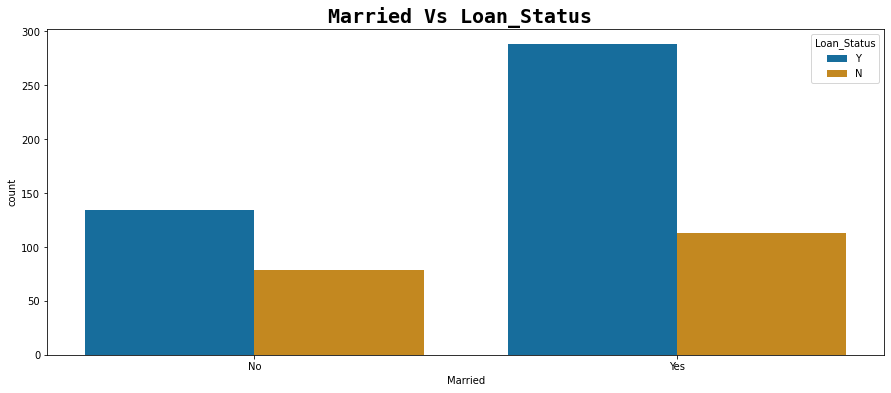

In [28]:
relation_target(df,'Married')

Around 300 applicants are married whose loans are approved as compared to the applicants who are not married but their loans were approved



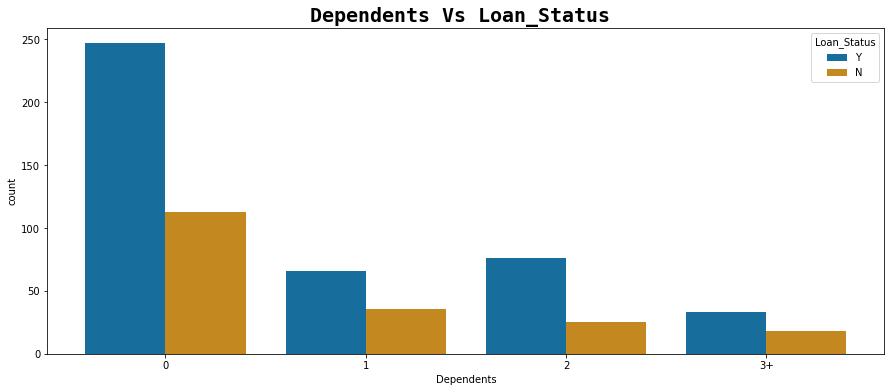

In [29]:
relation_target(df,'Dependents')

Majority of the applicants whose loans are approved have no or 0 dependency & the minimun loan approved to those who has higher number of dependents.



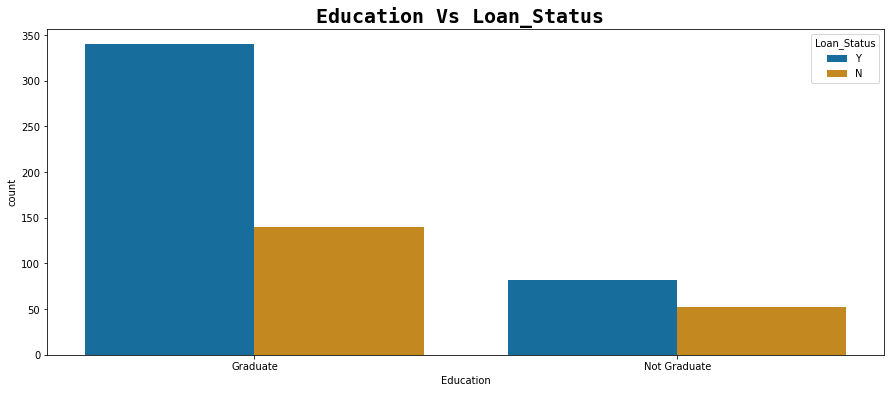

In [30]:
relation_target(df,'Education')

The count of graduates whose loans are approved is high as compared to the non graduates having approved loans.



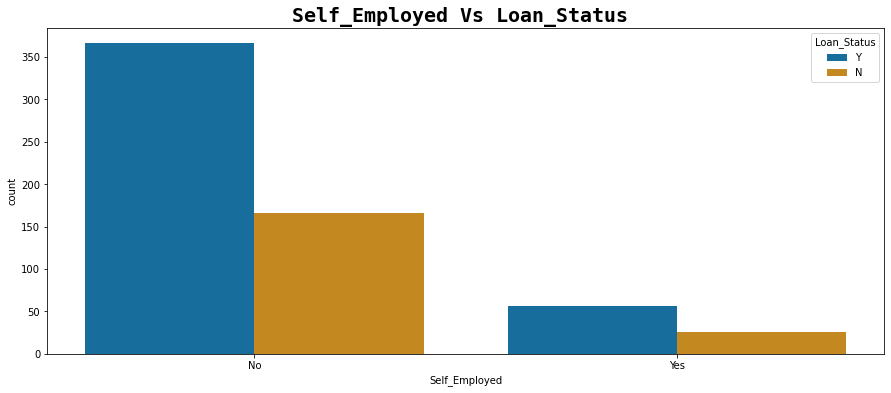

In [31]:
relation_target(df,'Self_Employed')

The percentage of self-employed applicants having approved loans is around 15% of the non self employed applicants having approved loans.



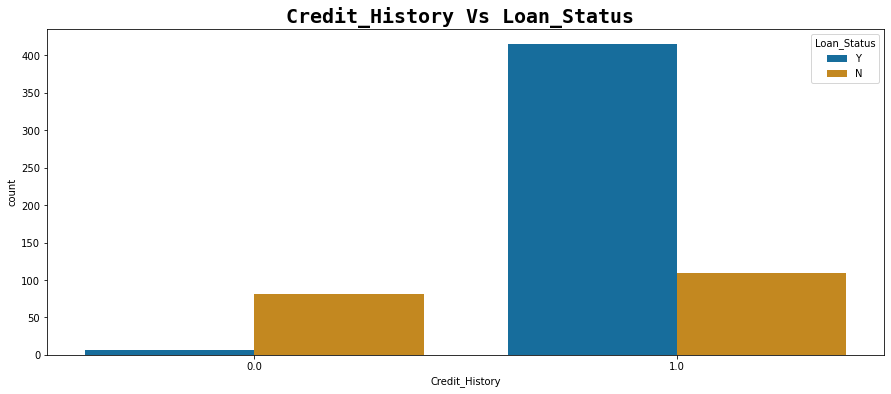

In [32]:
relation_target(df,'Credit_History')

People who has credit history 1 has the highest loan approval as compared to 0 credit history. People Who has zero credit score mostly they are denied to grant loan.



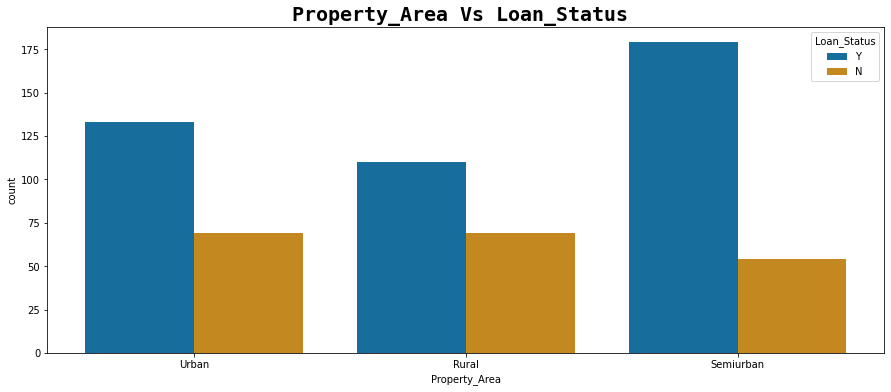

In [33]:
relation_target(df,'Property_Area')

The max. no. of applicants whose loans are approved belongs to or having property in semi-urban area.



In [50]:
num_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,128.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [35]:
def barplot_target(df,col):
    plt.figure(figsize=(15,6))
    plt.title(col+' Vs Loan_Status ',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
    sns.barplot(y =col, x="Loan_Status",palette='colorblind' ,data = df)
    plt.plot()

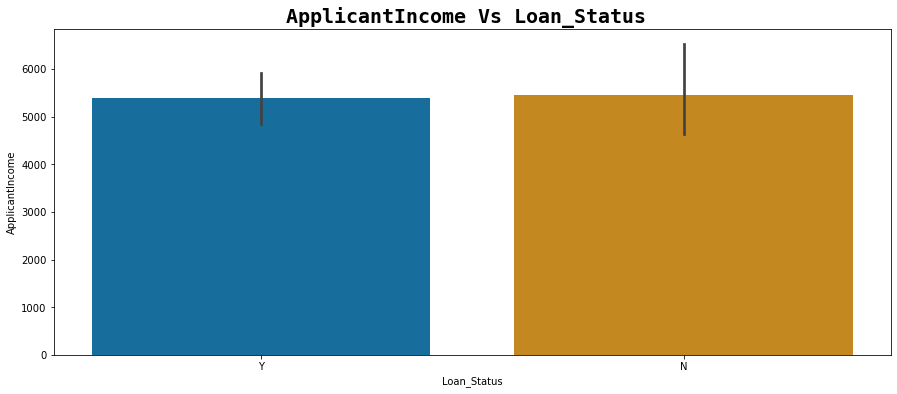

In [36]:
barplot_target(df,'ApplicantIncome')

There is almost similar income of people who sanction loans/ denied. Applicant income has no significance to decide whether loan will approve or not.

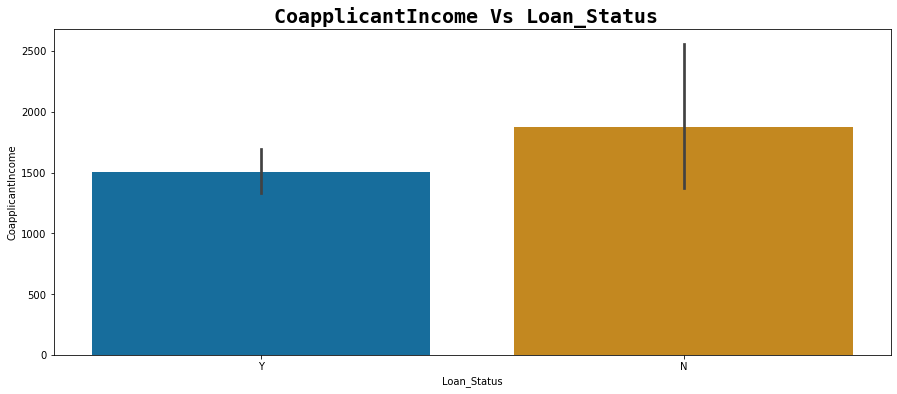

In [37]:
barplot_target(df,'CoapplicantIncome')

We can observe that, if co applicant income is higher than 1500, there are chances of denial to loan.



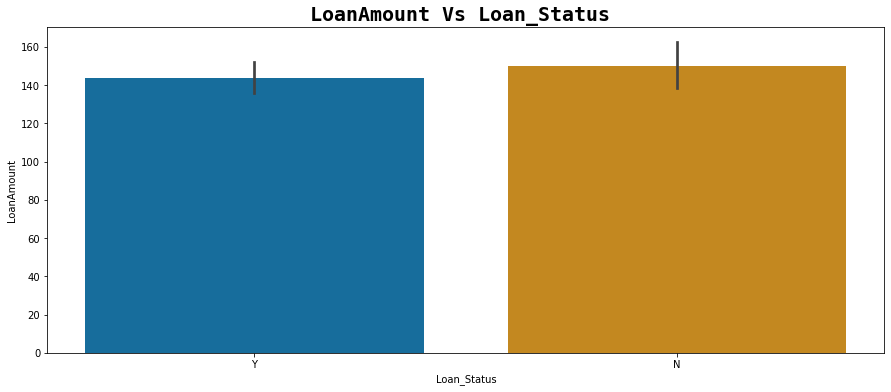

In [38]:
barplot_target(df,'LoanAmount')

There is almost similar trend regarding Loan Amount. There is no relation between Loan Amount and Loan Status.



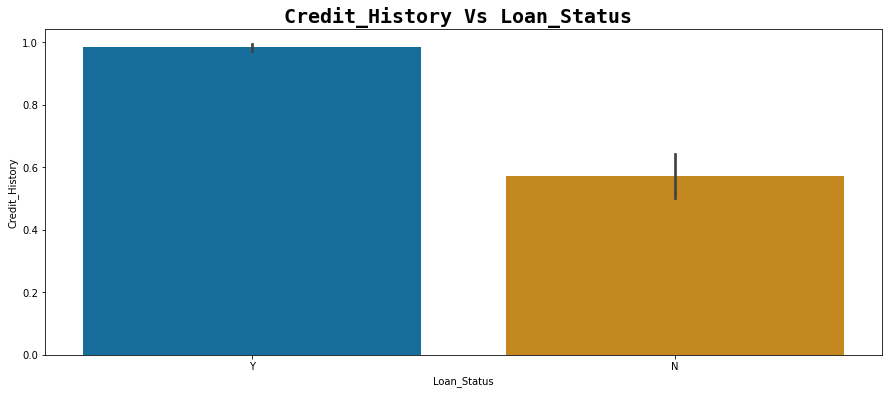

In [39]:
barplot_target(df,'Credit_History')

As earlier we can see that a person who has credit history one has highest loan approval rate



# Relation With Applicant Income and Other Attributes

[]

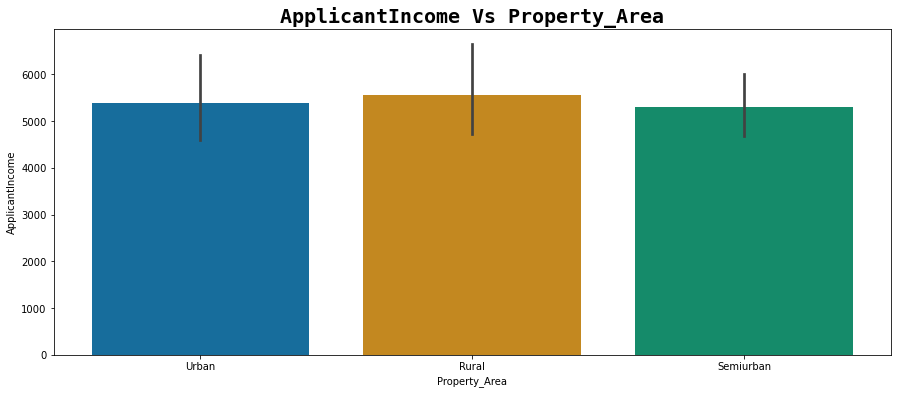

In [40]:
plt.figure(figsize=(15,6))
plt.title('ApplicantIncome Vs Property_Area',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.barplot(y ='ApplicantIncome', x="Property_Area",palette='colorblind' ,data = df)
plt.plot()

There is almost similar income status of applicants belong from different regions.



[]

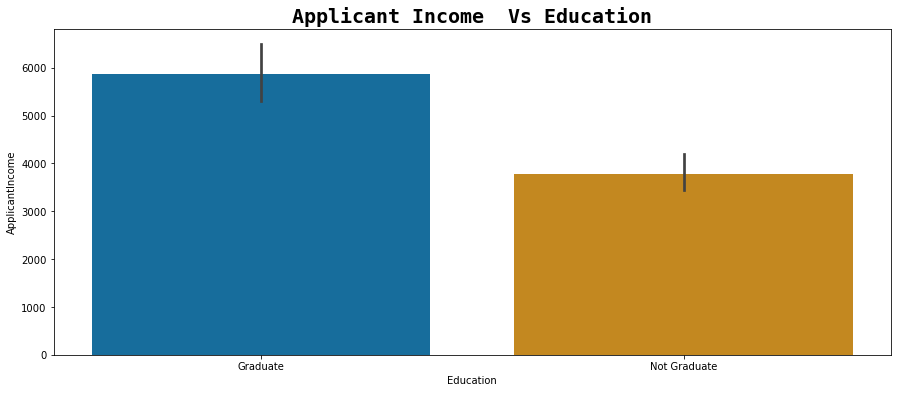

In [41]:
plt.figure(figsize=(15,6))
plt.title('Applicant Income  Vs Education',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.barplot(y ='ApplicantIncome', x="Education",palette='colorblind' ,data = df)
plt.plot()

Graduate Applicant's income is higher than non Graduate Applicants.

[]

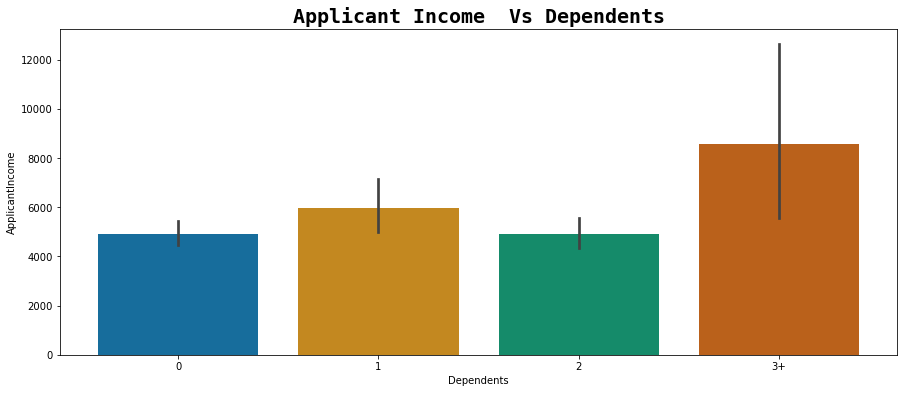

In [42]:
plt.figure(figsize=(15,6))
plt.title('Applicant Income  Vs Dependents',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.barplot(y ='ApplicantIncome', x="Dependents",palette='colorblind' ,data = df)
plt.plot()

The Applicant who has maximum number of depenents has higher income (8000+).



[]

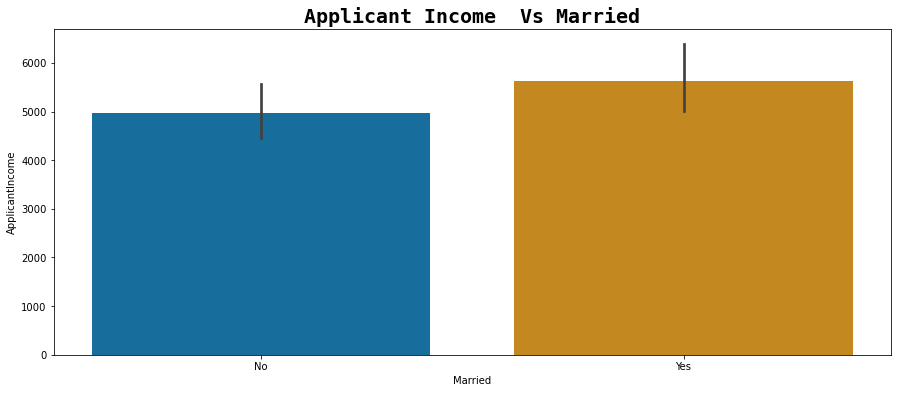

In [43]:
plt.figure(figsize=(15,6))
plt.title('Applicant Income  Vs Married',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.barplot(y ='ApplicantIncome', x="Married",palette='colorblind' ,data = df)
plt.plot()

The Applicant who are married has higher income as compared to unmarried applicants.



[]

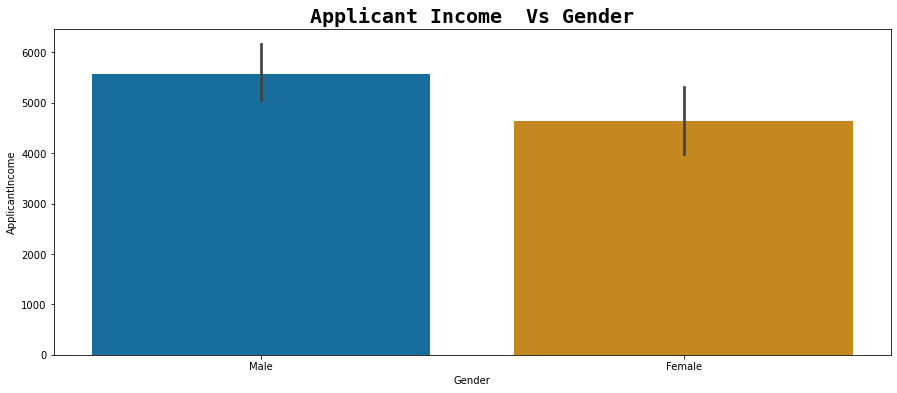

In [44]:
plt.figure(figsize=(15,6))
plt.title('Applicant Income  Vs Gender',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.barplot(y ='ApplicantIncome', x="Gender",palette='colorblind' ,data = df)
plt.plot()

Male applicant's income is higher than the female applicants.



[]

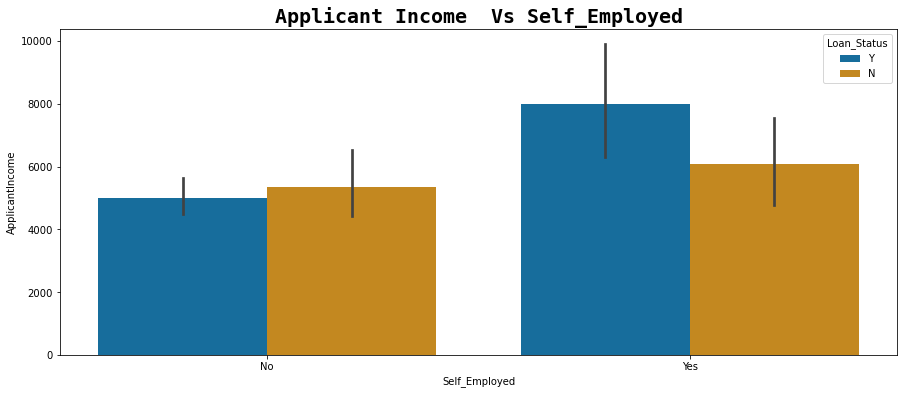

In [45]:
plt.figure(figsize=(15,6))
plt.title('Applicant Income  Vs Self_Employed',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.barplot(y ='ApplicantIncome', x="Self_Employed",hue='Loan_Status',palette='colorblind' ,data = df)
plt.plot()

We could see that the person who are self employed are earning well and their loan approval rate is also high as compared to non-self employed.



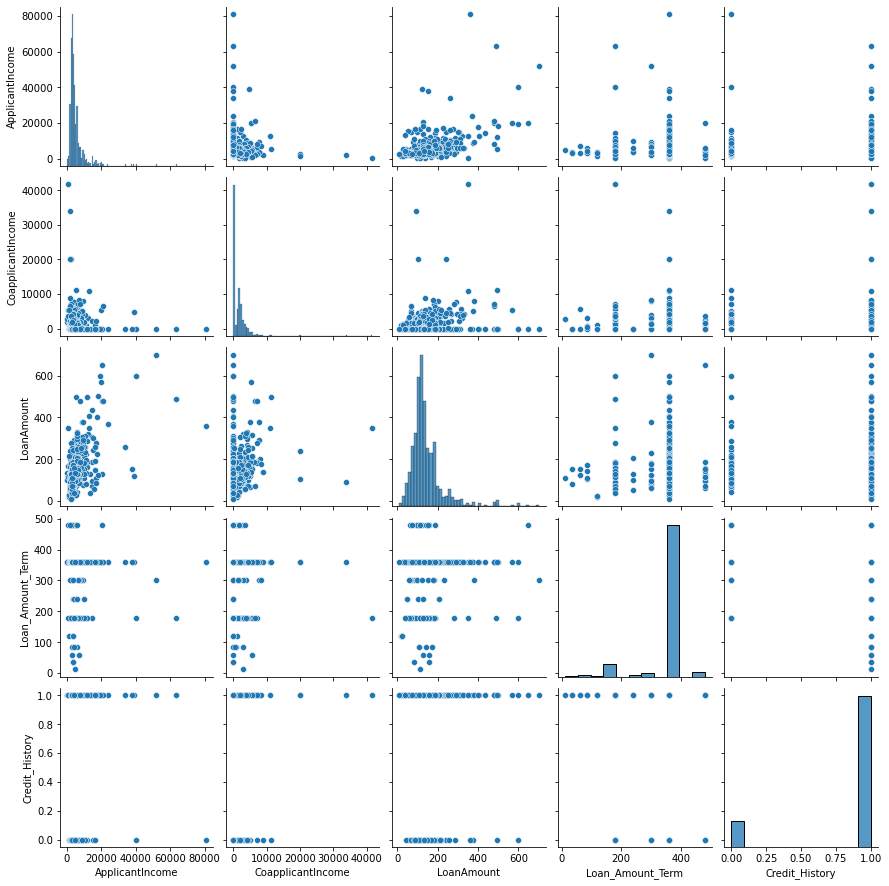

In [46]:
# Plotting a pair plot
sns.pairplot(df)

# Distribution

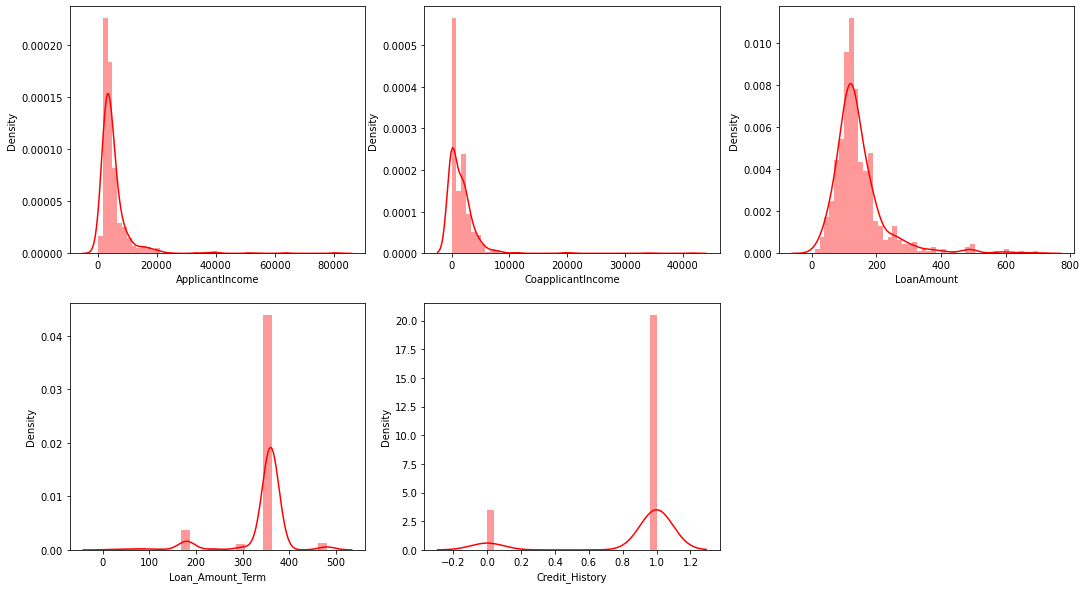

In [49]:
plt.figure(figsize=(18,10))
plot=1
for col in num_df:
    if plot<=6:
        plt.subplot(2,3,plot)
        sns.distplot(df[col],color='red')
        plt.xlabel(col)
        plot=plot+1
plt.show()

- We can see that applicants income, Co-applicants income, Loan Amount are right skewed.

- Loan Amount Term has majority values of 360 months.

- Credit history has only two values (0 or ). In which majority values are One.

# Outliers Detection

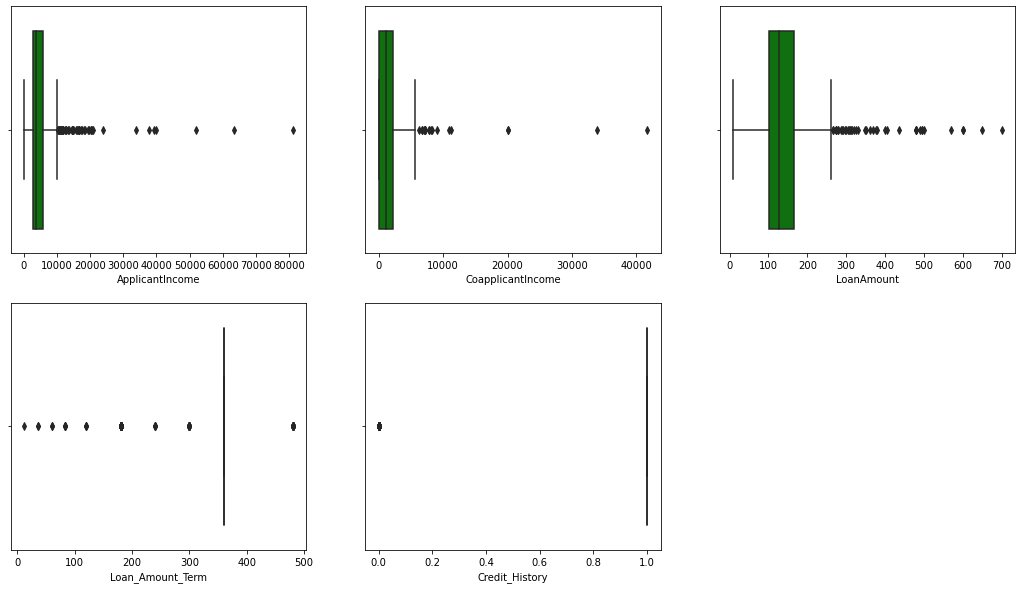

In [51]:
plt.figure(figsize=(18,10))
plot=1
for col in num_df:
    if plot<=6:
        plt.subplot(2,3,plot)
        sns.boxplot(df[col],color='green')
        plt.xlabel(col)
        plot=plot+1
plt.show()

Outliers are present in Appilcants Income, Coapplicants Income and Loan Amounts.

# Outliers Treatment

In [52]:
## when data is normally distributed.
def replace_outlier(df,col):
    IQR=df[col].quantile(.75)-df[col].quantile(.25)
    lower_limit=df[col].quantile(.25)-(1.5*IQR)
    upper_limit=df[col].quantile(.75)+(1.5*IQR)
    non_outlier=np.where((df[col]<lower_limit )|(df[col]>upper_limit),df[col].median(),df[col])
    df[col]=non_outlier
    plt.subplot(1,2,1)
    sns.distplot(df[col])
    plt.subplot(1,2,2)
    sns.boxplot(df[col])

In [53]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

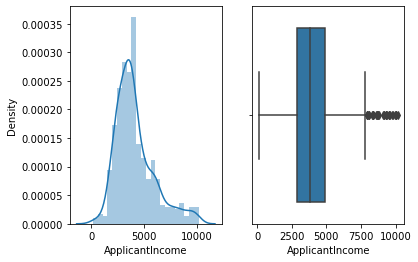

In [54]:
replace_outlier(df,'ApplicantIncome')

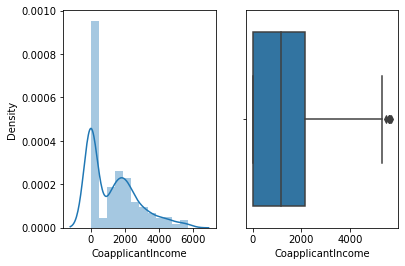

In [55]:
replace_outlier(df,'CoapplicantIncome')

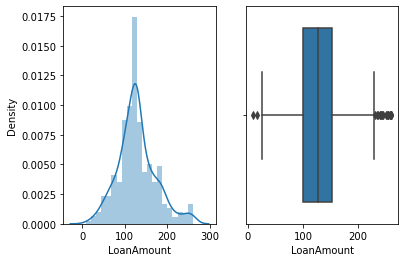

In [56]:
replace_outlier(df,'LoanAmount')

We have sucesfully replace our outliers from Applicant income,Co applicant Income & Loan Amount.

# Skewness

In [57]:
df_1=df.copy()

In [58]:
df_1.skew()

ApplicantIncome      1.149106
CoapplicantIncome    0.936471
LoanAmount           0.498333
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

In [59]:
df_1['ApplicantIncome']=np.sqrt(df_1['ApplicantIncome'])

In [60]:
df_1['CoapplicantIncome']=np.sqrt(df_1['CoapplicantIncome'])

In [61]:
df_1.skew()

ApplicantIncome      0.438048
CoapplicantIncome    0.152060
LoanAmount           0.498333
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

We have removed skewness to its possible extent.

# Label Encoding

In [62]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in obj_df:
    df_1[col]=le.fit_transform(df_1[col])

In [63]:
df_1.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,76.478755,0.000000,128.0,360.0,1.0,2,1
1,1,1,1,0,0,67.697858,38.832976,128.0,360.0,1.0,0,0
2,1,1,0,0,1,54.772256,0.000000,66.0,360.0,1.0,2,1
3,1,1,0,1,0,50.823223,48.559242,120.0,360.0,1.0,2,1
4,1,0,0,0,0,77.459667,0.000000,141.0,360.0,1.0,2,1
5,1,1,2,0,1,73.600272,64.776539,128.0,360.0,1.0,2,1
6,1,1,0,1,0,48.301139,38.935845,95.0,360.0,1.0,2,1
7,1,1,3,0,0,55.099909,50.039984,158.0,360.0,0.0,1,0
8,1,1,2,0,0,63.292970,39.064050,168.0,360.0,1.0,2,1
9,1,1,1,0,0,61.745445,34.474628,128.0,360.0,1.0,1,0


# Splitting Data into Input and Output Variable

In [64]:
x=df_1.drop(['Loan_Status'],axis=1)
y=df_1[['Loan_Status']]

In [65]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,76.478755,0.000000,128.0,360.0,1.0,2
1,1,1,1,0,0,67.697858,38.832976,128.0,360.0,1.0,0
2,1,1,0,0,1,54.772256,0.000000,66.0,360.0,1.0,2
3,1,1,0,1,0,50.823223,48.559242,120.0,360.0,1.0,2
4,1,0,0,0,0,77.459667,0.000000,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,53.851648,0.000000,71.0,360.0,1.0,0
610,1,1,3,0,0,64.078077,0.000000,40.0,180.0,1.0,0
611,1,1,1,0,0,89.844310,15.491933,253.0,360.0,1.0,2
612,1,1,2,0,0,87.080423,0.000000,187.0,360.0,1.0,2


In [66]:
y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


# Feature Scaling

In [67]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,1.005715,-1.043770,-0.010078,0.273231,0.411733,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.374031,0.521418,-0.010078,0.273231,0.411733,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.555816,-1.043770,-1.395146,0.273231,0.411733,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.839903,0.913442,-0.188797,0.273231,0.411733,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,1.076280,-1.043770,0.280339,0.273231,0.411733,1.223298
...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,-0.622043,-1.043770,-1.283447,0.273231,0.411733,-1.318513
610,0.472343,0.728816,2.236021,-0.528362,-0.392601,0.113630,-1.043770,-1.975981,-2.522836,0.411733,-1.318513
611,0.472343,0.728816,0.253470,-0.528362,-0.392601,1.967212,-0.419358,2.782397,0.273231,0.411733,1.223298
612,0.472343,0.728816,1.244745,-0.528362,-0.392601,1.768382,-1.043770,1.307970,0.273231,0.411733,1.223298


# Feature Importance

In [68]:
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra.fit(x,y)

ExtraTreesClassifier()

In [69]:
print(extra.feature_importances_)

[0.02189624 0.02033304 0.0625889  0.02497252 0.02465436 0.1876382
 0.09810253 0.17972542 0.04979252 0.27992468 0.05037158]


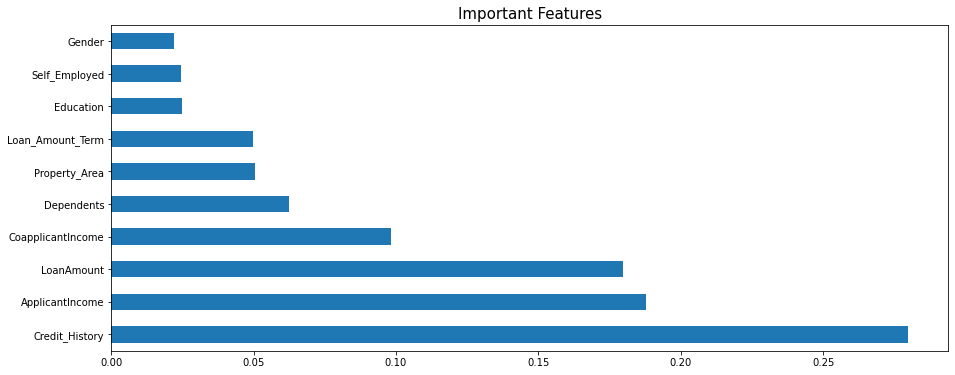

In [70]:
plt.figure(figsize=(15,6))
plt.title('Important Features',fontsize=15)
feat_importance=pd.Series(extra.feature_importances_,index=x.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()

# Model Building

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc
from imblearn.over_sampling import SMOTE

In [72]:
def max_accuracy_score(clf,x,y):
    max_accuracy=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i,stratify=y)
        #x_train,y_train=SMOTE().fit_resample(x_train,y_train) ##over sampling of our Data
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        accuracy_check=accuracy_score(y_test,pred)
        if accuracy_check>max_accuracy:
            max_accuracy=accuracy_check
            final_r=i
    print('max accuracy score corresponding to',final_r,'is',max_accuracy)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='accuracy').mean())
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='accuracy').std())
    print('\n')
    print('F1 score',f1_score(y_test,pred))
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train))
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test))
    print('\n')
    print('Confusion Matrix',confusion_matrix(y_test,pred))
    print('\n')
    print('Classification Report',classification_report(y_test,pred))
    print('\n')
    print('Roc_auc Score',roc_auc_score(y_test,pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc( false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate,label = "AUC = %0.2f"% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n\n")
    return final_r

max accuracy score corresponding to 76 is 0.8617886178861789


cross validation score 0.8078235372517659


Standard Deviation 0.026964969382167303


F1 score 0.903225806451613


Training accuracy 0.7983706720977597


Test Accuracy 0.8536585365853658


Confusion Matrix [[21 17]
 [ 1 84]]


Classification Report               precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



Roc_auc Score 0.7704334365325077





76

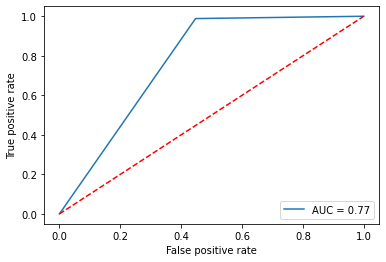

In [73]:
## Logistic Regression
lg=LogisticRegression()
max_accuracy_score(lg,x,y)

max accuracy score corresponding to 53 is 0.7560975609756098


cross validation score 0.7133280021324804


Standard Deviation 0.041273532431950984


F1 score 0.7804878048780488


Training accuracy 1.0


Test Accuracy 0.7073170731707317


Confusion Matrix [[23 15]
 [21 64]]


Classification Report               precision    recall  f1-score   support

           0       0.52      0.61      0.56        38
           1       0.81      0.75      0.78        85

    accuracy                           0.71       123
   macro avg       0.67      0.68      0.67       123
weighted avg       0.72      0.71      0.71       123



Roc_auc Score 0.6791021671826625





53

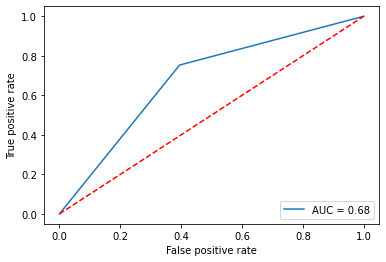

In [74]:
## DEcision Tree
dt=DecisionTreeClassifier()
max_accuracy_score(dt,x,y)

max accuracy score corresponding to 77 is 0.8536585365853658


cross validation score 0.7752232440357191


Standard Deviation 0.019884914661415495


F1 score 0.8695652173913043


Training accuracy 0.8004073319755601


Test Accuracy 0.8048780487804879


Confusion Matrix [[19 19]
 [ 5 80]]


Classification Report               precision    recall  f1-score   support

           0       0.79      0.50      0.61        38
           1       0.81      0.94      0.87        85

    accuracy                           0.80       123
   macro avg       0.80      0.72      0.74       123
weighted avg       0.80      0.80      0.79       123



Roc_auc Score 0.7205882352941176





77

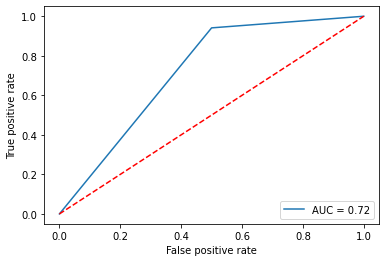

In [75]:
## KNn
knn=KNeighborsClassifier()
max_accuracy_score(knn,x,y)

max accuracy score corresponding to 76 is 0.8617886178861789


cross validation score 0.8045848327335733


Standard Deviation 0.029382051515228578


F1 score 0.903225806451613


Training accuracy 0.7983706720977597


Test Accuracy 0.8536585365853658


Confusion Matrix [[21 17]
 [ 1 84]]


Classification Report               precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



Roc_auc Score 0.7704334365325077





76

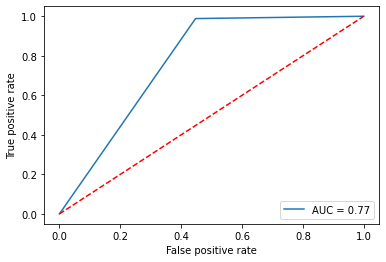

In [76]:
##Naive Bayes
gnb=GaussianNB()
max_accuracy_score(gnb,x,y)

max accuracy score corresponding to 89 is 0.8373983739837398


cross validation score 0.775223244035719


Standard Deviation 0.03458780645697239


F1 score 0.87292817679558


Training accuracy 1.0


Test Accuracy 0.8130081300813008


Confusion Matrix [[21 17]
 [ 6 79]]


Classification Report               precision    recall  f1-score   support

           0       0.78      0.55      0.65        38
           1       0.82      0.93      0.87        85

    accuracy                           0.81       123
   macro avg       0.80      0.74      0.76       123
weighted avg       0.81      0.81      0.80       123



Roc_auc Score 0.7410216718266254





89

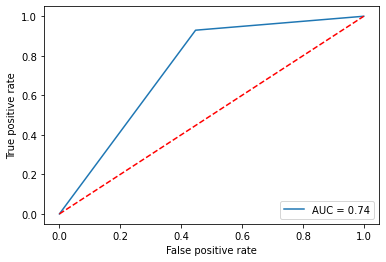

In [77]:
#Random forest
rf=RandomForestClassifier()
max_accuracy_score(rf,x,y)

max accuracy score corresponding to 49 is 0.8455284552845529


cross validation score 0.7768892443022791


Standard Deviation 0.010687030066237899


F1 score 0.8950276243093922


Training accuracy 0.8289205702647657


Test Accuracy 0.8455284552845529


Confusion Matrix [[23 15]
 [ 4 81]]


Classification Report               precision    recall  f1-score   support

           0       0.85      0.61      0.71        38
           1       0.84      0.95      0.90        85

    accuracy                           0.85       123
   macro avg       0.85      0.78      0.80       123
weighted avg       0.85      0.85      0.84       123



Roc_auc Score 0.7791021671826625





49

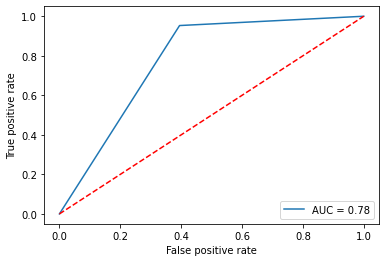

In [78]:
## adaboost
Adb=AdaBoostClassifier()
max_accuracy_score(Adb,x,y)

max accuracy score corresponding to 49 is 0.8292682926829268


cross validation score 0.7769025723044115


Standard Deviation 0.01932497804464715


F1 score 0.8666666666666667


Training accuracy 0.8757637474541752


Test Accuracy 0.8048780487804879


Confusion Matrix [[21 17]
 [ 7 78]]


Classification Report               precision    recall  f1-score   support

           0       0.75      0.55      0.64        38
           1       0.82      0.92      0.87        85

    accuracy                           0.80       123
   macro avg       0.79      0.74      0.75       123
weighted avg       0.80      0.80      0.80       123



Roc_auc Score 0.7351393188854488





49

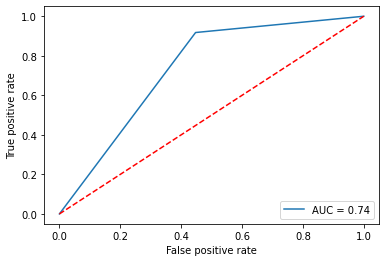

In [79]:
## Gardient Boost
gb=GradientBoostingClassifier()
max_accuracy_score(gb,x,y)

In [80]:
best_model=pd.DataFrame({'Model':['LogisticRegression','DecisionTreeClassifier','KNN','GaussianNB','RandomForestClassifier','AdaBoostClassifier','GradientBoostingClassifier'],
                         'Accuracy Score':[86.17,76.42,85.36,86.17,84.55,84.55,82.92],
                         'F1_Score':[90.32,79.76,86.95,90.32,86.66,89.50,86.66],
                         'Cross_validation':[80.72,69.70,77.52,80.45,77.52,77.68,77.52]})
best_model

,Model,Accuracy Score,F1_Score,Cross_validation
0,LogisticRegression,86.17,90.32,80.72
1,DecisionTreeClassifier,76.42,79.76,69.70
2,KNN,85.36,86.95,77.52
3,GaussianNB,86.17,90.32,80.45
4,RandomForestClassifier,84.55,86.66,77.52
5,AdaBoostClassifier,84.55,89.50,77.68
6,GradientBoostingClassifier,82.92,86.66,77.52


Based on above graph, It is clear that Logistic Regression is Most generalised model among all because the difference between Accuracy Score and cross validation score is miminum as compared to other models. So this would be our best model.

# Hyper Parameter Tuning

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=76,test_size=.20,stratify=y)
lg=LogisticRegression()
param={'penalty':['l2','l1','elasticnet'],'C':[.001,.01,.1,1,10],'solver':['newton-cg','lbfgs','liblinear','sag','saga'],'max_iter':[50,100,200]}

grid=GridSearchCV(estimator=lg,param_grid=param,scoring='accuracy',n_jobs=-1)

grid.fit(x_train,y_train)

grid.best_params_

{'C': 0.001, 'max_iter': 50, 'penalty': 'l2', 'solver': 'liblinear'}

In [82]:
lg_final=LogisticRegression(C= 0.001,max_iter=50,penalty='l2',solver='liblinear')
lg_final.fit(x_train,y_train)
pred=lg_final.predict(x_test)
print('Final Accuracy_score :',accuracy_score(pred,y_test))
print('\n')
print('Final f_1 score :',f1_score(pred,y_test))
print('\n')
print('Final roc_auc score :',roc_auc_score(pred,y_test))
print('\n')
print('Final classification Report :',classification_report(pred,y_test))
print('\n')
print('Final confusion Matrix :',confusion_matrix(pred,y_test))

Final Accuracy_score : 0.8617886178861789


Final f_1 score : 0.9090909090909091


Final roc_auc score : 0.9166666666666667


Final classification Report :               precision    recall  f1-score   support

           0       0.55      1.00      0.71        21
           1       1.00      0.83      0.91       102

    accuracy                           0.86       123
   macro avg       0.78      0.92      0.81       123
weighted avg       0.92      0.86      0.88       123



Final confusion Matrix : [[21  0]
 [17 85]]


we can see that by hyperparameter tuning our F1 score and Roc_auc score has improved. Our Accuracy score remained same. Hence we will save this as our best model



# Saving Our Model

In [83]:
import joblib
joblib.dump(lg_final,'Loan_status_lg.pkl')

['Loan_status_lg.pkl']

# Loading Our Model

In [84]:
loaded_model=joblib.load('Loan_status_lg.pkl')
prediction=loaded_model.predict(x_test)